# Plotting with Matplotlib

Matplotlib is a comprehensive library for creating simple, but also complex and even animated visualizations in Python. Matplotlib works well with Numpy and Pandas (coming up soon), because the ploted data can come in as an numpy `ndarray` or a pandas `Dataframe`. The whole documentation can be found under https://matplotlib.org/.

## Scatter and Line Plots

With `plt.plot` we can plot scatter plots and line plots, depending on the input. Useful to show functions (lines) and points (scatter) in datasets. It is the most basic matplotlib function and easy to use! The documentation can be found here:
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html (there is a lot to adjust to make cool plots!)

In [19]:
import matplotlib.pyplot as plt # typical way to import matplotlib
%matplotlib inline

Few short examples for creating scatter and line plots. In the first example, only markers are drawn, since the `linestyle` is not set (empty string).

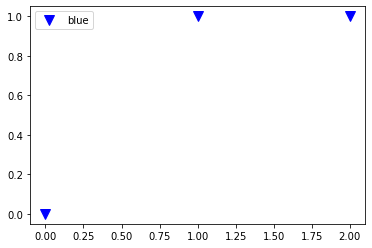

In [20]:
plt.plot([0,1,2], [0,1,1], marker="v", linestyle="", color="b", markersize=10, label="blue")
plt.legend()
plt.show()

We can also remove the markers in a similar way:

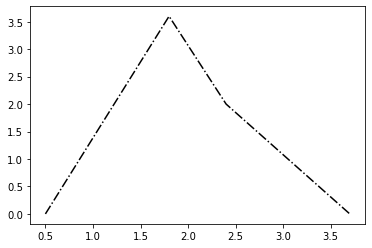

In [21]:
plt.plot([0.5,1.8,2.4,3.7], [0,3.6,2,0], marker="", linestyle="-.", color="k")
plt.show()

Scatterplots, are created with `plt.scatter` and are almost identical to line plots. They have more advanced options for customization. For example, we can change points style(such as color,size etc.) depending on other values.

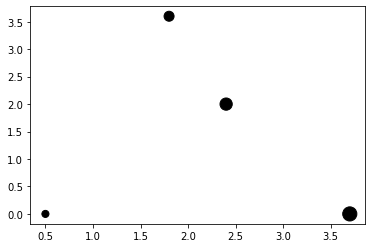

In [22]:
plt.scatter([0.5,1.8,2.4,3.7], [0,3.6,2,0], marker="o", color="k", s=np.array([1,2,3,4])*50)
plt.show()

We can also add multiple plots into one figure, by simply calling `plot` mutiple times.

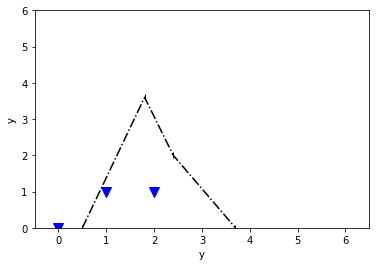

In [23]:
plt.plot([0,1,2], [0,1,1], marker="v", linestyle="", color="b", markersize=10, label="blue")
plt.plot([0.5,1.8,2.4,3.7], [0,3.6,2,0], marker="|", linestyle="-.", color="k")

plt.ylabel("y")
plt.xlabel("y")
plt.xlim(-0.5, 6.5)
plt.ylim(0,6)

plt.show()

If we want to display functons, we can use `linspace` from numpy to create an array of values between start and end value. Different to `arange`, `linspace` creates a set number of values between start and end, while `arange` goes a certain step size.

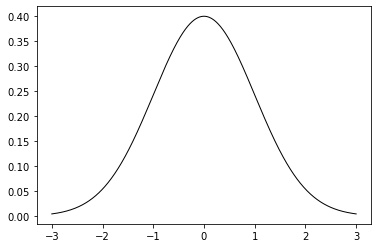

In [24]:
# display a gaus curve
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000) # create 1000 values
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (x - mu)**2 / (2 * sigma**2) ),'k', linewidth=1)
plt.show()

# Bar Plots

Bar plots are good to display and compare values for multiple categeories. They are created with the function `plt.bar()`. Here is the documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html. 
The following shows an example to build bar chart.

Text(0.5, 1.0, 'Comparison for different Tests between Group  A and B')

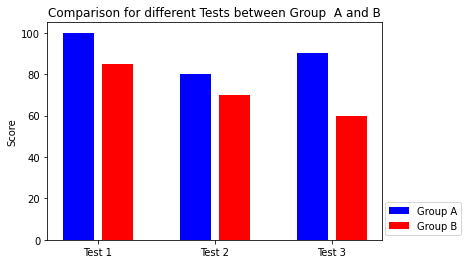

In [25]:
# create some values
values_group_A = [100, 80, 90] 
values_group_B = [85, 70, 60]

position_X_A = [1, 4, 7]
position_X_B = [2, 5, 8]

plt.bar(position_X_A, values_group_A, color='b', label='Group A')
plt.bar(position_X_B, values_group_B, color='r', label='Group B')

plt.legend(loc='lower right', bbox_to_anchor=(1.25, 0))
plt.xticks([1.5, 4.5, 7.5], ['Test 1', 'Test 2', 'Test 3'])
plt.ylabel('Score')
plt.title('Comparison for different Tests between Group  A and B')

## Histograms

Histograms are useful to display the repetition and distrubution of elements in a dataset. They are very similar to plot bars in appearance, but histograms are usually used for discrete distributions, while bar charts are used with discrete values for categeorial data. The documentation can be found under:https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html. The following shows some examples to build a histogram.

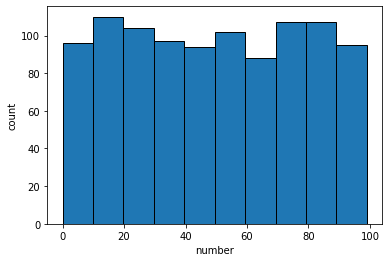

In [46]:
import numpy as np

test_scores = np.random.randint(low=0,high=100,size=1000)
bins = np.arange(10)
plt.hist(test_scores, edgecolor='black') # arange 8, because we have 7 bin-> 8 edges
plt.ylabel("count")
plt.xlabel("number")
#plt.xlim(-0.5, 7.5)
#plt.ylim(0,7)
plt.show()

We can also combine histograms with line plots to show trends.

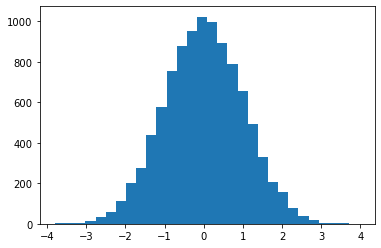

In [48]:
mu = 0
sigma = 1
bins=30
gauss = np.random.normal(mu, sigma, size=10000)
count, bins, ignored = plt.hist(gauss, bins=bins)
plt.show()

The plot above is not normalized. To get a probability distrubution, we need to set the parameter `density` to `True`.

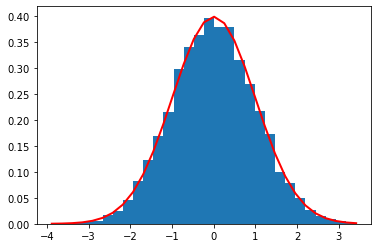

In [50]:
mu = 0
sigma = 1
bin_n=30
gauss = np.random.normal(size=10000)
counts, bins, patches = plt.hist(gauss, bins=bin_n, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

We of couse can also make the plot look even cooler!

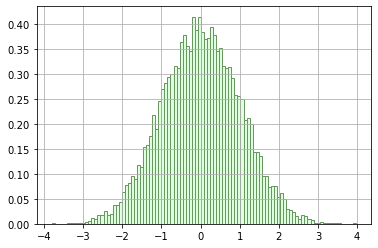

In [49]:
plt.hist(gauss, 
         bins=100, 
         density=True, 
         stacked=True, 
         edgecolor="#6A9662",
         color="#DDFFDD")
plt.grid()
plt.show()

Or vertical:

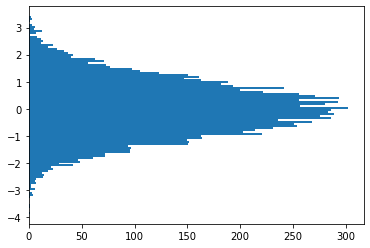

In [51]:
plt.hist(gauss, 
         bins=100, 
         orientation="horizontal")
plt.show()

There is really a lot to adjust. 

![](img/normal_distrubution_gifs.gif)

## Boxplots

Boxplot are used to display the distribution of (numerical) data by combining key values of the distrubution in one graph.
The five key values are:
- Minimum 
- Maximum 
- Median 
- Upper quartile and quartil (upper and lower range of 50% of data)
- Outliers

Boxplot are helpful to quickly see how data is distributed.

More on box plots: https://en.wikipedia.org/wiki/Box_plot

Documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

[9.5]


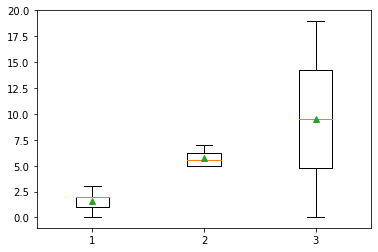

In [54]:
values = plt.boxplot([[0,1,2,3,2], [5,6,7,5], range(20)], showmeans=True)
plt.ylim(-1,20)
print(values["means"][2].get_ydata())
plt.show()

In [ ]:
#Show some outlier
values = list(range(20))
values.extend([5]*5)
values.append(30)
values = plt.boxplot([[0,1,2,3,2], [5,6,7,5], values], showmeans=True)
plt.ylim(-1,35)
print(values["means"][2].get_ydata())
plt.show()

## Image Plotting

We can also dislay images with the matplotlib library, and manipulate the images using known numpy mechanics. After all, an image is just an 3-dimensional array, with values x- and y-coordinate and RGB-value for each pixel. Therefore we can load images into a multi-dimensional numpy array. To load a image, we can use the `imread()` function from `matplotlib.image`.

![](img/image_rgb_layers.jpeg)

(372, 660, 3)


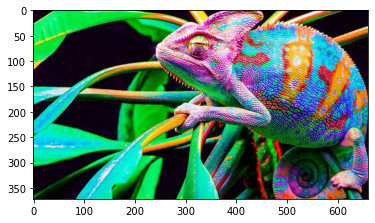

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('img/chameleon.jpg') # load image from current directory (thats where your notebook is)
print(img.shape) # look at shape
plt.imshow(img) # look at the image

When we look at the shape, we see there are 3 dimensions, while the last dimension has the size 3. There are the RGB values contained.

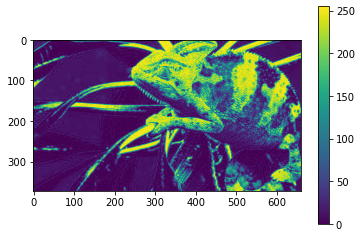

In [58]:
plt.imshow(img[:,:,0])
plt.colorbar()

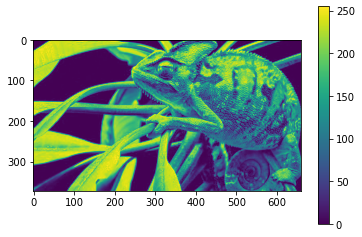

In [59]:
plt.imshow(img[:,:,1])
plt.colorbar()

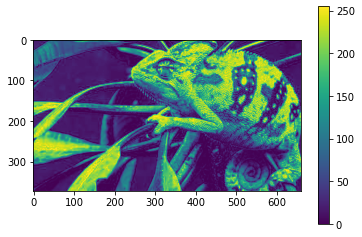

In [60]:
plt.imshow(img[:,:,2])
plt.colorbar()

Now, with a luminosity (2D, no color) image, the default colormap (aka. lookup table, LUT), is applied. The default is called viridis. There are plenty of others to choose from.

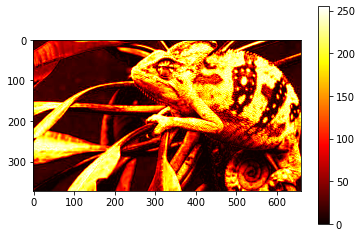

In [61]:
plt.imshow(img[:,:,2], cmap="hot")
plt.colorbar()

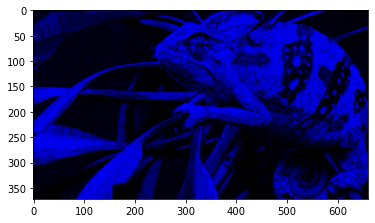

In [62]:
img_blue = img.copy() 
img_blue[:,:,:2] = 0
plt.imshow(img_blue)

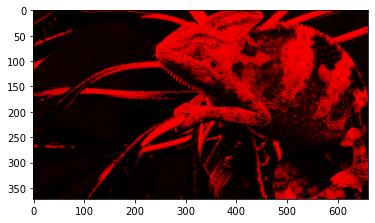

In [63]:
img_red = img.copy() 
img_red[:,:,1:3] = 0
plt.imshow(img_red)

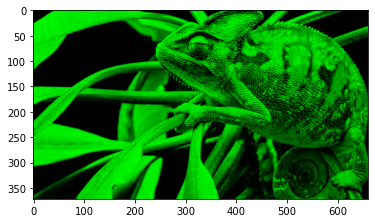

In [64]:
img_green = img.copy() 
img_green[:,:,::2] = 0
plt.imshow(img_green)

We can also slice the image into pieces using mumpy slicing.

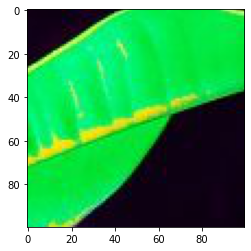

In [65]:
img_slice = img[:100,:100,:] # get the first 100*100 window from the window
plt.imshow(img_slice)

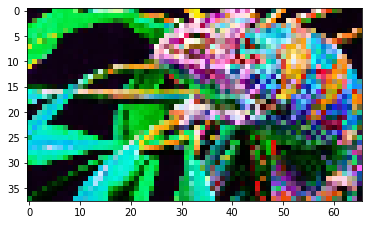

In [66]:
img_pixelated = img[::10,::10,:] # select only every tenth pixel
plt.imshow(img_pixelated)

## Multiple subplots

We can also easily create plots containing multiple plots together. For that we can use the `subplot` function.

In [1]:
arr1 = np.random.randint(0, 100, 1000)
arr2 = np.random.normal(50, 30, 1000)
arr3 = np.random.normal(70, 50, 1000)

fig, axes = plt.subplots(2,2, figsize=(10,10))
print(axes)
axes[0][0].hist(gauss, bins=bins, density=True)

axes[0][0].plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
axes[0][1].plot([0,1],[0,1])
axes[1][0].boxplot([arr1,arr2,arr3], labels=['uniform','normal50', 'normal70'])
axes[1][1].imshow(img)

plt.show()

NameError: name 'np' is not defined

## Jupyter commands

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
plt.plot([1,2],[2,1])
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()
plt.plot([1,2],[2,1], c="r")
plt.xlim(0,5)
plt.ylim(0,5)

NameError: name 'plt' is not defined